In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heapq


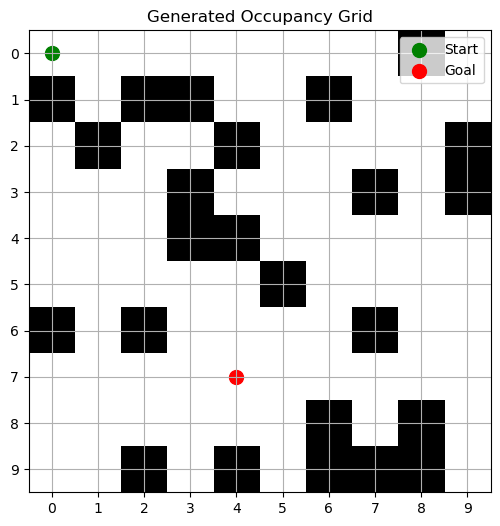

In [2]:

# Grid size
GRID_SIZE = 10

# A* Pathfinding Algorithm
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star_search(grid, start, goal):
    """Runs A* algorithm to determine if a valid path exists."""
    neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    close_set = set()
    came_from = {}
    gscore = {start: 0}
    fscore = {start: heuristic(start, goal)}
    open_set = []
    heapq.heappush(open_set, (fscore[start], start))
    
    while open_set:
        _, current = heapq.heappop(open_set)
        
        if current == goal:
            return True  # Path exists
        
        close_set.add(current)
        for i, j in neighbors:
            neighbor = (current[0] + i, current[1] + j)
            if 0 <= neighbor[0] < GRID_SIZE and 0 <= neighbor[1] < GRID_SIZE:
                if grid[neighbor] == 1 or neighbor in close_set:
                    continue  # Obstacle or already visited

                tentative_g_score = gscore[current] + 1
                if neighbor not in gscore or tentative_g_score < gscore[neighbor]:
                    came_from[neighbor] = current
                    gscore[neighbor] = tentative_g_score
                    fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (fscore[neighbor], neighbor))
    
    return False  # No valid path found

# Generate Random Grid
def generate_valid_grid(obstacle_density=0.2):
    """Generates a 10x10 occupancy grid ensuring a valid path exists."""
    while True:
        grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)
        start = (0, 0)
        goal = (np.random.randint(0, GRID_SIZE), np.random.randint(0, GRID_SIZE))
        
        # Ensure goal is not the start position
        while goal == start:
            goal = (np.random.randint(0, GRID_SIZE), np.random.randint(0, GRID_SIZE))
        
        # Randomly place obstacles
        for i in range(GRID_SIZE):
            for j in range(GRID_SIZE):
                if (i, j) != start and (i, j) != goal and np.random.rand() < obstacle_density:
                    grid[i, j] = 1  # Mark as obstacle
        
        # Check if valid path exists using A*
        if a_star_search(grid, start, goal):
            return grid, start, goal

# Visualize Grid
def plot_grid(grid, start, goal):
    plt.figure(figsize=(6,6))
    plt.imshow(grid, cmap="gray_r")
    plt.scatter(start[1], start[0], color='green', s=100, label="Start")
    plt.scatter(goal[1], goal[0], color='red', s=100, label="Goal")
    plt.legend()
    plt.grid(True)
    plt.xticks(range(GRID_SIZE))
    plt.yticks(range(GRID_SIZE))
    plt.title("Generated Occupancy Grid")
    plt.show()

# Generate and visualize a valid grid
grid, start, goal = generate_valid_grid(obstacle_density=0.2)
plot_grid(grid, start, goal)
